# Analiza podatkov za projektno nalogo

Pozdravljeni,
v tem zvežčiču bom analiziral uroke, katere sem pobral iz spletne strani [dnd5e][1]. Analiza teh bo precejšen iziv, saj za vsakim urokom leži poleg podrobnega opisa tudi interpretacija igralca, voditelja igre in iznajdljivost obeh. Pretehtali bomo torej lahko merljive zahteve in omejitve, za natančnejšo analizo je pa priporočljiva vztrajnost v obliki igre, saj le tako srečamo nešteto scenarijev in uporab, ki jih seznam sam ne more povzeti. Poleg tega zna v napoto hoditi tudi spletna stran, saj je ta delo prostovoljcev in vsebuje napake. Opažene nedoslednosti lahko omenite na [forumu][3].

## Nekaj malega o igri

Najpomembnejši v igri so igralci z njihovimi junaki. Junak je oseba, kateri igralec določi raso, ceh, ozadje in tekom igre še veliko več. Kar se tiče izdelave junaka je igralcem dana precejšna svoboda, ampak za lažji potek in uravnovešenost igre se je pametno držati v naprej podanih okvirjev. Tako junaki pridobijo kompetence za spopadanje z nalogami, ki jim jih zadajo [NPC][2]-ji in zmožnost bojevanja. Tu imajo uroki pomembno vlogo, saj jih igralec lahko uporablja bodisi na vsakodnevni ravni za razreševanje problemov bodisi v boju za okrevanje in zadajanje škode. 

Pomembna lastnost uroka je tudi stopnja, ki mu je dodeljena. Na določeni ravni junaka, so nam na voljo le uroki do vključno neke stopnje. Če to ponazorim: junak, ki je šele začel z igro bo lahko uporabljal le uroke na ničelni in prvi stopnji, proti koncu igre pa bo zmožen izvesti tudi uroke na deveti stopnji, ki so neprimerno močnejši.

Vsak urok ima osnovne karakteristike, ki so: 

- ime (`uroki.csv`), 
- šolo čaranja (`sola.csv`), 
- čas potreben za izvedbo uroka (`urocanje.csv`), 
- možnost izvedbe uroka v obliki rituala (`uroki.csv`),
- doseg (`doseg.csv`), 
- čas, ko je urok aktiven (`efekt.csv`),
- in za izvedbo potrebne komponente (snovne, gibalne in glasovne) (`uroki.csv`),
- stopnjo uroka, ki je med 0 in 9 (`uroki.csv`).

Te podatke sem pobral s svetovnega spleta in jih uredil v `csv` datoteke. Poleg teh lastnosti imajo uroki tudi natančne opise, do katerih lahko dostopate preko `http://dnd5e.wikidot.com/spell:{urok_href}`, kjer je za vsak urok `urok_href` možno najti v datoteki `uroki.csv`.



[1]: <http://dnd5e.wikidot.com/spells> "Uroki v D&D"
[2]: <https://en.wikipedia.org/wiki/Non-player_character> "Več o NPC-jih"
[3]: <http://dnd5e.wikidot.com/forum:start> "Forum za uporabnike in moderatorje"

In [309]:
import pandas as pd

In [310]:
uroki = pd.read_csv('podatki/uroki.csv').rename(columns={'sola': 'sola_id', 'urocanje': 'urocanje_id', 'doseg': 'doseg_id', 'efekt': 'efekt_id'})
sola = pd.read_csv('podatki/sola.csv').rename(columns={'ime': 'sola', 'id': 'sola_id'})
urocanje = pd.read_csv('podatki/urocanje.csv').rename(columns={'ime': 'urocanje', 'id': 'urocanje_id'})
doseg = pd.read_csv('podatki/doseg.csv').rename(columns={'ime': 'doseg', 'id': 'doseg_id'})
efekt = pd.read_csv('podatki/efekt.csv').rename(columns={'ime': 'efekt', 'id': 'efekt_id'})

In [311]:
uroki_polni = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                uroki, 
                sola, 
                on='sola_id'), 
            urocanje, 
            on='urocanje_id'), 
        doseg, 
        on='doseg_id'),
    efekt,
    on='efekt_id')

In [312]:
del uroki_polni['sola_id']
del uroki_polni['urocanje_id']
del uroki_polni['doseg_id']
del uroki_polni['efekt_id']

In [313]:
uroki_polni

,urok_href,urok,ritual,verbal,somatic,material,stopnja,sola,urocanje,doseg,efekt
0,acid-splash,Acid Splash,False,True,True,False,0,conjuration,1 action,60 feet,instantaneou
1,ice-knife,Ice Knife,False,False,True,True,1,conjuration,1 action,60 feet,instantaneou
2,planar-ally,Planar Ally,False,True,True,False,6,conjuration,1 action,60 feet,instantaneou
3,frostbite,Frostbite,False,True,True,False,0,evocation,1 action,60 feet,instantaneou
4,ray-of-frost,Ray of Frost,False,True,True,False,0,evocation,1 action,60 feet,instantaneou
...,...,...,...,...,...,...,...,...,...,...,...
556,snare,Snare,False,True,True,True,1,abjuration,1 minute,touch,until dispelled or triggered
557,symbol,Symbol,False,True,True,True,7,abjuration,1 minute,touch,until dispelled or triggered
558,forbiddance,Forbiddance,True,True,True,True,6,abjuration,10 minute,touch,1 day
559,tsunami,Tsunami,False,True,True,False,8,conjuration,1 action,sight,concentration up to 6 round


## Vsakodnevna uporaba

V igri je vsak dan malo drugačen, a po svoje vedno pester, zato se vedno izvaja neka coprnija, ampak s tem se ojavi precejšen problem, saj je število urokov, ki jih lahko izvedemo na dan omejeno. Imamo pa vseeno možnost izvedbe uroka v ritualni obliki. To nam omogoči dobiti vse prednosti uroka na osnovni ravni, če ga uročamo 10 minut dlje. Žal pa možnost ritualnega uročanja ni dana vsakemu uroku, zato nas zanima koliko ritualnih urokov obstaja za vsako stopnjo, ter kolikšen je delež le-teh. S temi informacijami se bomo dokopali do dejanskega arsenala urokov, ki ga imamo vsak dan.

Z upoštevanjem dejstva, da nam lažji uroki vedno ostanejo na voljo, da slehernega lahko uporabimo v nešteto okoliščinah ter da je vsakodnevnih problemov, ki so razrešljivi z magijo manj kot bi si mislili, postavim hipotezo, da število na novo pridobljenih urokov z vsako stopnjo pada.

Tu bi še dodal, da mnogo pravil, ki jih omenjam, velja le za ceh *Cleric*, saj ta na začetku vsakega dne izbere uroke, ki so mu na voljo tisti dan na dani junakovi ravni. Pri preostalih cehih izgleda pridobivanje urokov zelo drugače.

In [314]:
ritualni = uroki_polni[uroki_polni.ritual]

<AxesSubplot:xlabel='stopnja'>

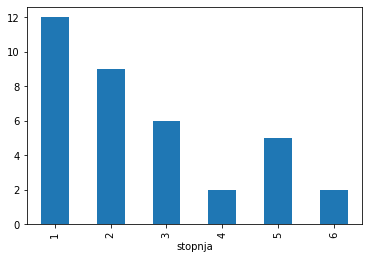

In [315]:
ritualni.groupby('stopnja').size().plot.bar()

Sedaj smo prebrali uroke in izluščili tiste, ki jih lahko izvedemo kot ritual. Na grafu opazimo, da se število urokov po stopnji manjša in da urokov ničelne stopnje oz. *cantrip*-ov sploh ni. Razlog za to je, da število izvedb urokov ničelne stopnje ni omejeno in varčevanje v obliki rituala ni potrebno. Kako pa se po stopnjah njihovo število pomeri s številom vseh urokov? Ker določenih stopenj ritualnih urokov sploh nimamo, bodo te stopnje nadalje izpuščene.

<AxesSubplot:xlabel='stopnja'>

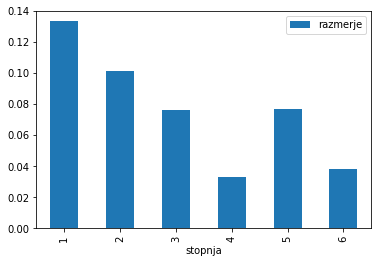

In [316]:
a = ritualni.groupby('stopnja').count()['urok']
b = uroki_polni.groupby('stopnja').count()['urok']
razmerje_ritual = pd.merge(b, a, on='stopnja')
razmerje_ritual['razmerje'] = razmerje_ritual['urok_y'] / razmerje_ritual['urok_x']
razmerje_ritual = razmerje_ritual.drop(['urok_x', 'urok_y'], axis=1)
razmerje_ritual.plot.bar()

Naposled opazimo, da tudi razmerja $ \frac{\# \text{ritualnih neke stopnje}}{\# \text{vseh urokov neke stopnje}} $ pada s stopnjo uroka. Izstopata peta in šesta stopnja, kjer se razmerje poveča napram četrti stopnji.

<AxesSubplot:xlabel='stopnja'>

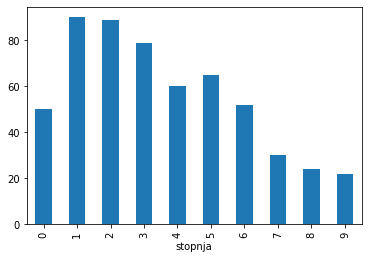

In [317]:
uroki_polni.groupby('stopnja').size().plot.bar()

Podoben vzorec zasledimo tudi v skupnem številu urokov po stopnjah. Razlage, če obstaja, ne znam podati.

## Uročanje

Uročanje nam pove koliko časa potrebujemo, da nek urok izvedemo. Seveda bi radi iz danih podatkov izčrpali kar se le da veliko, na primer kaj je najpogostejši čas uročanja, kolikšen je povprečen čas in koliko časa bi potrebovali, da bi zaporedoma izvedli prav vse uroke?

In [318]:
urocanje

,urocanje,urocanje_id
0,1 action,1
1,1 bonus action,2
2,1 minute,3
3,1 reaction,4
4,1 hour,5
5,10 minute,6
6,reaction,7
7,self,8
8,1 action or 8 hour,9
9,8 hour,10


Preden nadaljujemo, moramo izračunati še dolžino *action*-a, *bonus action*-a in *reaction*-a.

Boj v igri poteka po potezah, vsaka traja okvirno 6 sekund, tekom te pa imamo na voljo premik, napad ali dodatni premik in pomožen napad.
Definiramo si še funkcijo $ t: \text{dejanje} \mapsto \text{čas} $ za katero velja sledeč zapis:

$$ t(\text{poteza}) = t(\text{premik}) + t(\text{napad/dodatni premik}) + t(\text{pomožen napad}) $$

Standardni premik znaša 10 metrov.
S pomočjo štoparice in cimra sem izmeril, da sta za premik, ko si obtežen, potrebni okvirno 2 sekundi in pol. Dodatni premik z letečim startom pa naposled zahteva le sekundo in pol. Ker je možno izvesti enaki potezi, ki se razlikujeta le v drugem delu, sklepamo, da dodaten premik porabi isto časa kot uročanje, torej 1 *action*. Ugotovili smo, da je $ t(\text{premik}) = 2,5s $ in $ t(\text{napad/dodatni premik}) = 1,5s $. Ostane nam še preprost račun:

$$ 6 s = 2,5 s + 1,5 s + t(\text{dodaten napad}) $$

$$ \Rightarrow t(\text{dodaten napad}) = 2s $$

Dolžine *reaction*-a nam ni potrebno računati, saj je uročanje enako dolgo 1 *action*, izvedba pa hipna ob določenem dogodku.

Sedaj, ko smo se s pomočjo znanstvenih metod dokopali do vseh neznank lahko računamo dalje. Prvo poglejmo kateri čas je najpogostejši.

In [319]:
urocanje_presteto = uroki_polni.groupby('urocanje').size()

<AxesSubplot:xlabel='urocanje'>

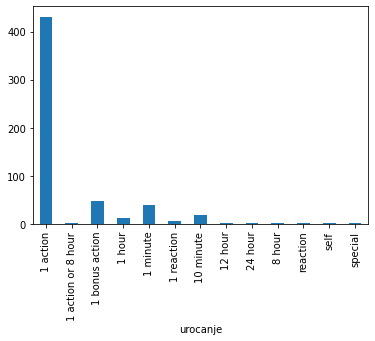

In [320]:
urocanje_presteto.plot.bar()

### Najpogostejši čas

Najpogostejši čas uročanja je brez dvoma 1 *action*. Na tej točki pa se pokažejo trije problemi:
 1. *1 action or 8 hour*: pojavi se en urok, ki ga je mogoče izvesti bodisi v 1.5 sekunde bodisi v osmih urah. Učinek se glede na čas uročanja spremeni, zato bomo kasneje upoštevali oba.
 2. *self* in *special*: ker to tudi v igri nista časovni enoti, ugibam, da gre za napako na spletni strani. 

In [321]:
uroki_polni[uroki_polni.urocanje == 'self']

,urok_href,urok,ritual,verbal,somatic,material,stopnja,sola,urocanje,doseg,efekt
436,melfs-minute-meteors,Melf's Minute Meteors,False,True,True,True,3,evocation,self,120 feet,concentration up to 10 minute


To je urok, ki naj bi imel za uročanje *self*, na [spletu][1] pa hitro ugotovimo, da je dejansko uročanje 1 *action*.

[1]: <http://dnd5e.wikidot.com/spell:melfs-minute-meteors> "Podroben opis uroka"

In [322]:
uroki_polni[uroki_polni.urocanje == 'special']

,urok_href,urok,ritual,verbal,somatic,material,stopnja,sola,urocanje,doseg,efekt
506,soul-cage,Soul Cage,False,True,True,True,6,necromancy,special,60 feet,8 hour


Tu prav tako na [spetu][1] ugotovimo, da je pravilno uročanje *reaction*.

[1]: <http://dnd5e.wikidot.com/spell:soul-cage> "Podroben opis uroka"

Oboroženi z vsem tem znanjem lahko izračunamo skupen čas teoretičnega uročanja.

In [323]:
urocanje_presteto

urocanje
1 action              431
1 action or 8 hour      1
1 bonus action         47
1 hour                 12
1 minute               39
1 reaction              7
10 minute              18
12 hour                 1
24 hour                 1
8 hour                  1
reaction                1
self                    1
special                 1
dtype: int64

### Skupen čas

$$ 442 \cdot 1.5 s + 47 \cdot 2 s + 64 \cdot 3600 s + 18 \cdot 600 s = 241957 s $$

Seštevek v sekundah preveden na bolj otipljive količine nam da: 2 dneva 19 ur 12 minut in 37 sekund!
Presenetljivo dolgo, vendar ne spreglejte, da en dan in 20 ur porabimo za uročanje le treh urokov.

### Povprečen čas

Uroke imamo razporejene v oštevilčen seznam, zato brez težav definiramo zaporedje $ (\text{urok}_n)_{n \in \nu} $, kjer je $ \nu $ množica indeksov urokov.
Povprečen čas tedaj dobimo s preprosto formulo:

$$ \frac{1}{|\nu|} \sum_{n \in \nu} t(\text{urok}_n) $$

Za $n$ vzamemo skupno število urokov, ki je 561 in dobimo 431,3 s = 7 min 11 s.

Podrobnejša analiza bo prišla v poštev čez eno leto, ko bom seznanjen z več statistike.

## Efekt

Po uspešni izvedbi uroka njega efekt traja različno dolgo, lahko v trenutku sprosti neznanske količine energije, za vedno spremeni svet, za kratek čas vzpostavi povezavo z božanstvom, za leto dni obogati sadove narave ali pa kaj čisto drugega. Analiza teh podatkov zaradi nezmožnosti kvanticiranja moči oz. vpliva. Za preprost primer lahko podam uroka *Create or Destroy Water* in *Cure Wounds*. Prvi ustvari vsaj 50l vode, drugi pa pozdravi manjšo poškodbo. Kateri o teh je močnejši in uporabnejši je povsem odvisno od okoliščin.

## Šola

Šola v grobem razloči uroke glede na njihov učinek. Ne igra večje vloge v poteku igre, vseeno pa pomaga pri interpretaciji uroka. Zaradi manjše vplivnosti ugibam, da ne bo večjih razmakov med številom urokov določene šole v splošnem in znotraj posameznih stopenj. V kolikor tedve hipotezi ne zdržita, bom skušal ugotoviti, katera od šol je najbolj zastopana znotraj posamezne stopnje in nasploh.

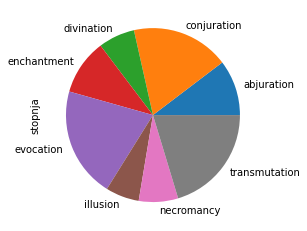

In [443]:
soladf = uroki_polni.loc[:, ('stopnja', 'sola')]
soladf.groupby('sola').count().plot.pie(y='stopnja', legend=False)
fig.set_facecolor('lightgrey')

Prva hipoteza očitno ne zdrži.

<AxesSubplot:>

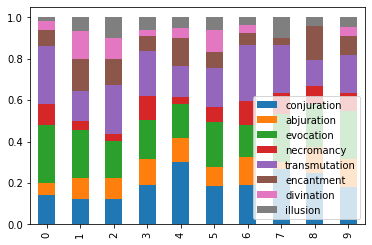

In [415]:
sole = sola.copy().drop('sola_id', axis=1)
for i in range(10):
    sole = pd.merge(sole, soladf[soladf.stopnja == i].groupby('sola').count().rename(columns={'stopnja': i}), how='outer', on='sola')
sole = sole.T
sole = sole.rename(columns={0: 'conjuration', 1: 'abjuration', 2: 'evocation', 3: 'necromancy', 4: 'transmutation', 5: 'encantment', 6: 'divination', 7: 'illusion'}).drop(
    'sola', axis=0)
st_urokov_po_stopnji = uroki_polni.groupby('stopnja').size()
sole = sole.div(st_urokov_po_stopnji, axis=0)
sole.plot.bar(stacked=True)
    

Opazimo, da tudi znotraj stopenj porazdelitve niso enakomerne. Kako pa se pomerijo po stopnjah?

<AxesSubplot:>

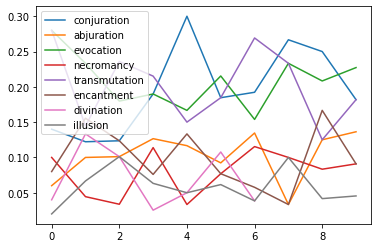

In [429]:
sole.plot()

Opazimo, da na vsaki od stopenj prevladujejo *conjuration*, *evocation* in *transmutation* šole. Katera od teh je pa v povprečju najbolj zastopana?

In [441]:
sole.mean().sort_values(ascending=False)

evocation        0.208782
transmutation    0.201959
conjuration      0.195110
abjuration       0.102599
encantment       0.099396
necromancy       0.079196
divination       0.067673
illusion         0.058820
dtype: float64

V poprečju pride največ urokov iz *evocation* šole, najmanj pa iz šole *illusion*. Čeprav je *evocation* na vrhu, sta ji zelo blizu tudi *transmutation* in *conjuration*. Nadalje poglejmo, [kaj nam pove šola uroka][1] in kolikšen delež urokov zavzame:
- *evocation*, 20%: sprostitev magične energije za napad,
- *transmutation*, 20%: preobrazba snovi,
- *conjuration*, 20%: ustvarjanje in uničevanje snovi,
- *abjuration*, 10%: magična zaščita,
- *enchantment*, 10%: magična nadgraditev,
- *necromancy*, 8%: manipulacija življenjske energije,
- *divination*, 6,5%: vedeževanje,
- *illusion*, 5,5%: manipulacija čutov in dojemanja.

[1]: <https://thealpinedm.com/dnd-5e-schools-of-magic/> "Kratek opis šol."

## Zahteve

Za izvedbo poljubnega uroka je potrebno zadostiti določenim kriterijem:
- *snovnim:* potrebujemo sestavine ali
- *gibalnim:* potrebni so premiki ali
- *glasovnim:* izgovorjava uroka.
Poleg zahtev za izvedbo, kriteriji predstavljajo tudi omejitve, saj se lahko znajdemo v okoliščinah, kjer se ne moremo premikat (smo pod vplivom uroka Hold Person, zvezani,..), ne moremo govorit (npr. urok Silence ali Hold Person) ali pa nimamo zadosti potrebščin. 

Postavim hipotezo, da ima vsak urok vsaj en kriterij.

In [326]:
def dodaj_crke(row):
    niz = ''
    if row.verbal:
        niz += 'V'
    if row.somatic:
        niz += 'S'
    if row.material:
        niz += 'M'
    return niz

In [327]:
uk = uroki_polni.loc[:, ('urok', 'verbal', 'somatic', 'material')]
uk['niz'] = uk.apply(lambda row: dodaj_crke(row), axis=1)
uk

,urok,verbal,somatic,material,niz
0,Acid Splash,True,True,False,VS
1,Ice Knife,False,True,True,SM
2,Planar Ally,True,True,False,VS
3,Frostbite,True,True,False,VS
4,Ray of Frost,True,True,False,VS
...,...,...,...,...,...
556,Snare,True,True,True,VSM
557,Symbol,True,True,True,VSM
558,Forbiddance,True,True,True,VSM
559,Tsunami,True,True,False,VS


In [328]:
uk[uk.niz == '']

,urok,verbal,somatic,material,niz


Ni uroka brez kriterjev. Koliko je pa takih z enim kriterijem in kateri od teh je najpogostejši?

In [329]:
uk[uk.apply(lambda row: len(row.niz) == 1, axis=1)]

,urok,verbal,somatic,material,niz
18,Catapult,False,True,False,S
19,Knock,True,False,False,V
22,Vicious Mockery,True,False,False,V
23,Dissonant Whispers,True,False,False,V
24,Power Word: Pain,True,False,False,V
...,...,...,...,...,...
514,Encode Thoughts,False,True,False,S
524,Distort Value,True,False,False,V
528,Thaumaturgy,True,False,False,V
533,True Strike,False,True,False,S


<AxesSubplot:xlabel='niz'>

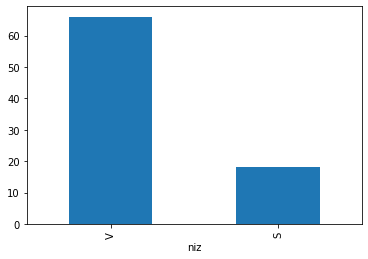

In [330]:
uk[uk.apply(lambda row: len(row.niz) == 1, axis=1)].groupby('niz').size().sort_values(ascending=False).plot.bar()

Kar 84 urokov ima skromne kriterije in noben izmed teh nima samo snovnih zahtev. Največ od teh zahteva le glasovno izvedbo.

In [331]:
uk[uk.apply(lambda row: len(row.niz) == 2, axis=1)]

,urok,verbal,somatic,material,niz
0,Acid Splash,True,True,False,VS
1,Ice Knife,False,True,True,SM
2,Planar Ally,True,True,False,VS
3,Frostbite,True,True,False,VS
4,Ray of Frost,True,True,False,VS
...,...,...,...,...,...
547,Prestidigitation,True,True,False,VS
549,Etherealness,True,True,False,VS
551,Skywrite,True,True,False,VS
554,Contagion,True,True,False,VS


<AxesSubplot:xlabel='niz'>

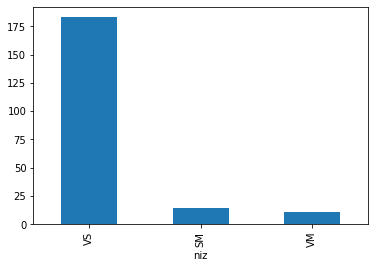

In [332]:
uk[uk.apply(lambda row: len(row.niz) == 2, axis=1)].groupby('niz').size().sort_values(ascending=False).plot.bar()

In [333]:
uk[uk.apply(lambda row: row.niz == 'VS', axis=1)]

,urok,verbal,somatic,material,niz
0,Acid Splash,True,True,False,VS
2,Planar Ally,True,True,False,VS
3,Frostbite,True,True,False,VS
4,Ray of Frost,True,True,False,VS
5,Sacred Flame,True,True,False,VS
...,...,...,...,...,...
547,Prestidigitation,True,True,False,VS
549,Etherealness,True,True,False,VS
551,Skywrite,True,True,False,VS
554,Contagion,True,True,False,VS


208 urokov ima dve zahtevi, od tega s 183 velika večina zaheva glasovno in gibalno izvedbo.

In [334]:
uk[uk.apply(lambda row: len(row.niz) == 3, axis=1)]

,urok,verbal,somatic,material,niz
6,Shatter,True,True,True,VSM
7,Widogast's Web of Fire (HB),True,True,True,VSM
8,Flame Strike,True,True,True,VSM
21,Disintegrate,True,True,True,VSM
31,Infestation,True,True,True,VSM
...,...,...,...,...,...
555,Glyph of Warding,True,True,True,VSM
556,Snare,True,True,True,VSM
557,Symbol,True,True,True,VSM
558,Forbiddance,True,True,True,VSM


Preostalih 269 urokov ima najstrožje zahteve in zahteva poleg glasovne in gibalne izvedbe tudi snov.